# IMDb Sentiment Classifier — EDA & Preprocessing

This notebook performs exploratory data analysis (EDA) and text preprocessing for the IMDb movie reviews dataset. The cleaned data will be used in downstream sentiment classification tasks.

### Objectives:
- Load and inspect the raw IMDb dataset
- Visualize sentiment distribution and review lengths
- Clean and preprocess the text reviews
- Save the cleaned dataset for modeling


## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter

# NLP
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords

## 1) Load & Visualize Dataset

In [3]:
# Loading the imdb dataset csv, from the data folder
imdb_reviews_df = pd.read_csv(r'..\data\IMDB Dataset.csv')
imdb_reviews_df.info()
imdb_reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


From the dataframe above, we see that the imdb dataset has **50,000 entries** with 2 columns: **review** and **sentiment** of type Object

## Explaratory Data Analysis (EDA)

### Sentiment Class Distribution

In [4]:
# Checking what values we have in the sentiment feature
imdb_reviews_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

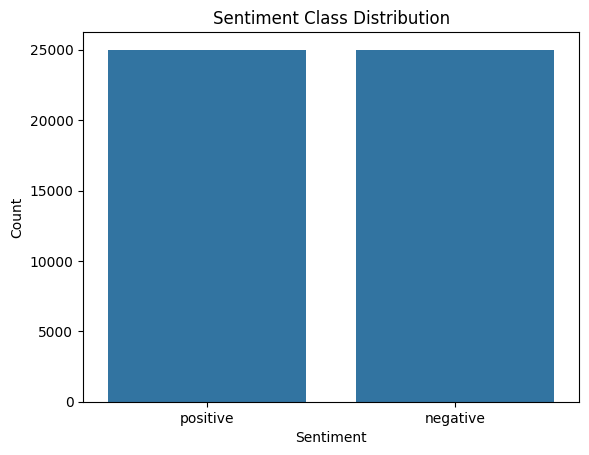

In [5]:
sns.countplot(x='sentiment', data=imdb_reviews_df)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

The **sentiment** has two values either: Positive or Negative  
The dataset is perfectly balanced with 25,000 positive and 25,000 negative reviews.

### Checking Reviews Length

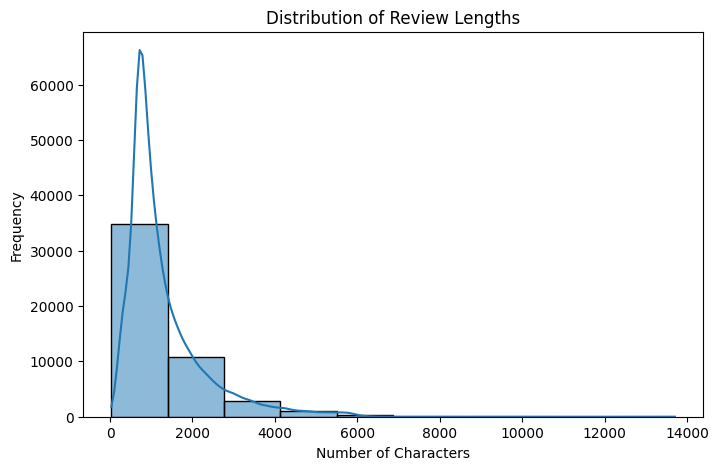

In [6]:
imdb_reviews_df['review_length'] = imdb_reviews_df['review'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(imdb_reviews_df['review_length'], bins=10, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

## Clean the IMDB Reviews

In [7]:
first_review = imdb_reviews_df['review'][0]
first_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
stop_words = set(stopwords.words('english'))

def clean_reviews_text(text):
    # Due to the finding some html formatting, we will clean the text using beautifulSoup as <br>
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-letter characters (punctuation, digits)
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # lowercase
    text = text.lower()

    # Split to tokens
    tokens = text.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [9]:
imdb_reviews_df['clean_review'] = imdb_reviews_df['review'].apply(clean_reviews_text)
imdb_reviews_df

,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,1280,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,1234,going disagree previous comment side maltin on...


In [10]:
imdb_reviews_df[['clean_review', 'sentiment']].to_csv('../data/imdb_clean.csv', index=False)

## EDA after Data Cleaning

### Examples Before and After

In [ ]:
# In order to see full text, we set max_colwidth to None
pd.set_option('display.max_colwidth', None)
# We are viewing a small sample of 3 imdb reviews before and after cleaning
imdb_reviews_df[['review', 'clean_review']].sample(3)

,review,clean_review
12325,"Being a huge street fighter fan and thoroughly enjoying the previous film, Street Fighter II: The Animated Movie, I was really looking forward to this one!<br /><br />However, it seemed that the film had no real sense of direction or purpose. Most of the characters I could not associate with and it just lacked the intense action that made the other mentioned street fighter film so superior.<br /><br />There are some good points however, the Animation is superb!!!",huge street fighter fan thoroughly enjoying previous film street fighter ii animated movie really looking forward one however seemed film real sense direction purpose characters could associate lacked intense action made mentioned street fighter film superior good points however animation superb
6615,"""The Merchant of Venice"" was one of Shakespeare's most popular plays during his own lifetime, but it has fallen on hard times during the 20th century because of its undeniably anti-Semitic content. The play has also been called schizoid in its careening from comedic scenes to tragic ones, leading some to say it is two plays trying to coexist as one. Bassanio (Joseph Fiennes, who played William Shakespeare in ""Shakespeare in Love"") is in love with Portia (Lynn Collins, superb), but needs to borrow a considerable sum of money to woo her. He goes to his sometime gay lover Antonio (Jeremy Irons), who hasn't the funds on his person, but takes out a loan from the Jewish usurer Shylock (Al Pacino). Shylock is amused and offended that Antonio, who insults him for his religion, now comes to him for money, but he offers it, on the condition that the penalty for defaulting on the loan will be a pound of Antonio's flesh. Which is, of course, what happens. Bassanio and Portia offer Shylock considerably more then the original loan instead of the pound of flesh, but Shylock, distraught after his daughter leaves him and marries a Christian, refuses to take it. Portia, in a scene where the audience is never quite sure where to place its sympathies, deprives Shylock of what should be legally his, and then strips him of his wealth and religion. Shylock was originally essayed as a cartoonish villain, but modern actors and directors have turned him into a tragic figure, railing against the injustices of 16th century Venice. Al Pacino does an excellent job as Shylock, and Jeremy Irons is good as Antonio, but I think that Lynn Collins' work as Portia is the best part of the play. Portia is one of the few notable female roles in Shakespeare's canon, and Collins is wonderful in the part. Joseph Fiennes is more than a bit dull, however; I've never particularly enjoyed his often overwrought acting style. I give ""The Merchant of Venice"" an 8/10.",merchant venice one shakespeare popular plays lifetime fallen hard times th century undeniably anti semitic content play also called schizoid careening comedic scenes tragic ones leading say two plays trying coexist one bassanio joseph fiennes played william shakespeare shakespeare love love portia lynn collins superb needs borrow considerable sum money woo goes sometime gay lover antonio jeremy irons funds person takes loan jewish usurer shylock al pacino shylock amused offended antonio insults religion comes money offers condition penalty defaulting loan pound antonio flesh course happens bassanio portia offer shylock considerably original loan instead pound flesh shylock distraught daughter leaves marries christian refuses take portia scene audience never quite sure place sympathies deprives shylock legally strips wealth religion shylock originally essayed cartoonish villain modern actors directors turned tragic figure railing injustices th century venice al pacino excellent job shylock jeremy irons good antonio think lynn collins work portia best part play portia one notable female roles shakespeare canon collins wonderful part joseph fiennes bit dull however never particularly enjoyed often overwrought acting style g

### Word Cloud based on Sentiment

In [11]:
# Getting Positive Reviews
positive_reviews = imdb_reviews_df[imdb_reviews_df['sentiment'] == 'positive']
positive_reviews

,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,656,probably time favorite movie story selflessnes...
...,...,...,...,...
49983,"I loved it, having been a fan of the original ...",positive,695,loved fan original series always wondered back...
49985,Imaginary Heroes is clearly the best film of t...,positive,1168,imaginary heroes clearly best film year comple...
49989,I got this one a few weeks ago and love it! It...,positive,967,got one weeks ago love modern light filled tru...
49992,John Garfield plays a Marine who is blinded by...,positive,968,john garfield plays marine blinded grenade fig...


In [12]:
# Getting Negative Reviews 
negative_reviews = imdb_reviews_df[imdb_reviews_df['sentiment'] == 'negative']
negative_reviews

,review,sentiment,review_length,clean_review
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...
7,"This show was an amazing, fresh & innovative i...",negative,934,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,negative,681,encouraged positive comments film looking forw...
10,Phil the Alien is one of those quirky films wh...,negative,578,phil alien one quirky films humour based aroun...
11,I saw this movie when I was about 12 when it c...,negative,937,saw movie came recall scariest scene big bird ...
...,...,...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative,759,typical junk comedy almost laughs genuine mome...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,1280,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,1234,going disagree previous comment side maltin on...


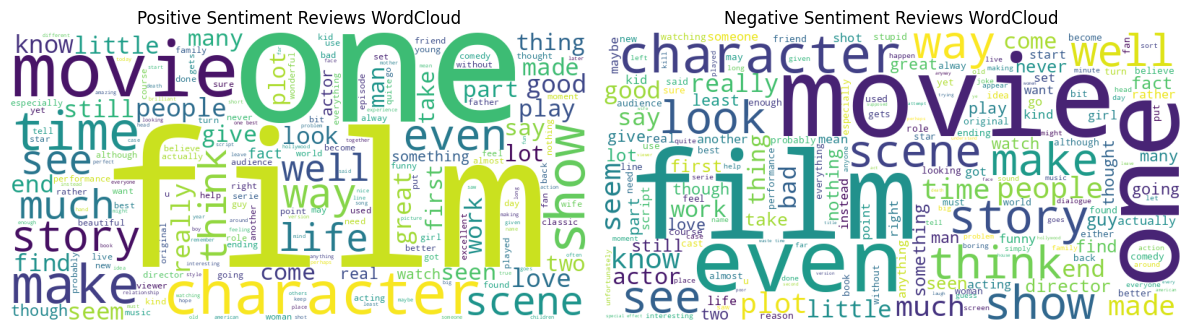

In [13]:
positive_text = ' '.join(positive_reviews['clean_review'])
negative_text = ' '.join(negative_reviews['clean_review'])

positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(positive_wordcloud)
plt.title("Positive Sentiment Reviews WordCloud")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(negative_wordcloud)
plt.title("Negative Sentiment Reviews WordCloud")
plt.axis('off')

plt.tight_layout()
plt.show()

### Review length by sentiment

Text(0.5, 1.0, 'Review Length Distribution by Sentiment')

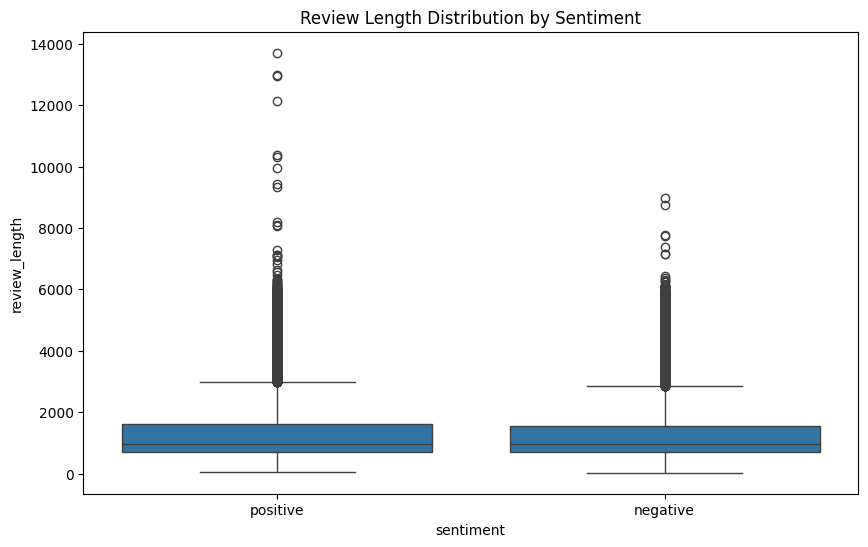

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='review_length', data=imdb_reviews_df)
plt.title('Review Length Distribution by Sentiment')

### Most Common Words Analysis

Common Words:
 [('movie', 87938), ('film', 79676), ('one', 53585), ('like', 40160), ('good', 29737), ('time', 25100), ('even', 24856), ('would', 24599), ('story', 23110), ('really', 23090), ('see', 23021), ('well', 21260), ('much', 19316), ('bad', 18461), ('get', 18415), ('people', 18182), ('great', 18137), ('also', 17972), ('first', 17576), ('made', 16150)]


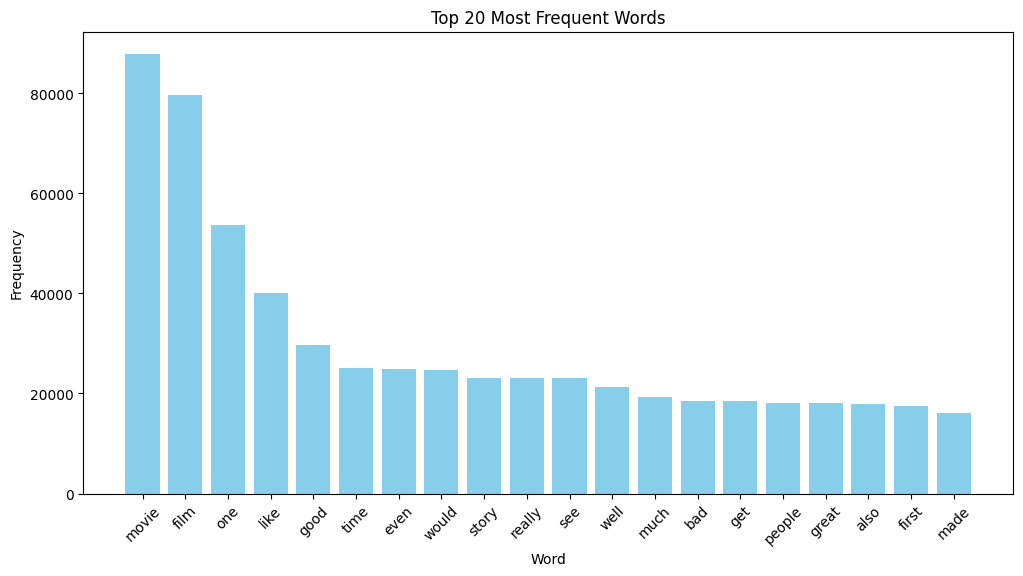

In [17]:
all_words = ' '.join(imdb_reviews_df['clean_review']).split()
common_words = Counter(all_words).most_common(20)

print("Common Words:\n",common_words)

words, freqs = zip(*common_words)

plt.figure(figsize=(12,6))
plt.bar(words, freqs, color='skyblue')
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

### Vocabulary Size Comparison

In [26]:
original_vocab = set(' '.join(imdb_reviews_df['review']).split())
clean_vocab = set(' '.join(imdb_reviews_df['clean_review']).split())
reduction_percentage = ((len(original_vocab)- len(clean_vocab)) / len(original_vocab)) * 100  
print(f"Vocabulary reduction: From {len(original_vocab)} To {len(clean_vocab)} by {reduction_percentage:.2f}%")

Vocabulary reduction: From 438729 To 101246 by 76.92%


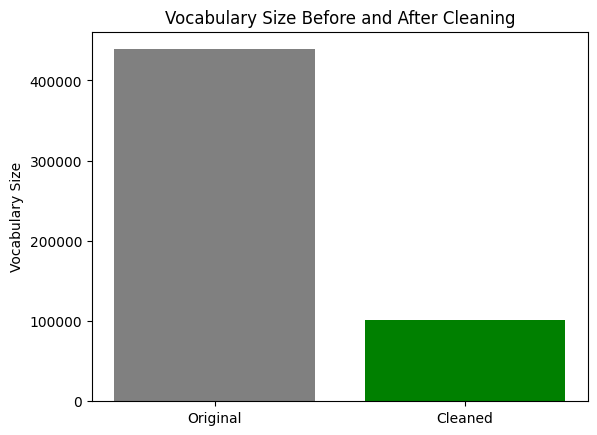

In [28]:
labels = ['Original',  'Cleaned']
sizes = [len(original_vocab), len(clean_vocab)]

plt.bar(labels, sizes, color=['gray', 'green'])
plt.title('Vocabulary Size Before and After Cleaning')
plt.ylabel('Vocabulary Size')
plt.show()